In [72]:
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as sp
import random
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.cm as cm

Get Bounds of Initial Dataset

In [73]:
data_folder = Path("data/roadimages")
no_roads_folder = "1 _ No Roads"

file_paths = [file_path for file_path in data_folder.rglob("*") if file_path.is_file() and no_roads_folder not in file_path.parts]

file_names = [file_path.stem for file_path in data_folder.rglob("*") if file_path.is_file() and no_roads_folder not in file_path.parts]

file_parts = [file_name.split("_") for file_name in file_names]

sorted_file_parts = sorted(file_parts, key=lambda x: float(x[-1]))

min_lon = float(sorted_file_parts[0][-1])
max_lon = float(sorted_file_parts[-1][-1])
sorted_file_parts

sorted_file_parts = sorted(file_parts, key=lambda x: float(x[-2]))
min_lat = float(sorted_file_parts[0][-2])
max_lat = float(sorted_file_parts[-1][-2])
#sorted_file_parts


print("Minimum latitude:", min_lat)
print("Maximum latitude:", max_lat)

print("Minimum longitude:", min_lon)
print("Maximum longitude:", max_lon)

Minimum latitude: 14.501167
Maximum latitude: 14.69918
Minimum longitude: 120.963593
Maximum longitude: 121.105042


In [74]:
shape = gpd.read_file("data/shapefiles/gis_osm_roads_free_1.shp")
dataset_area = gpd.read_file("data/shapefiles/dataset_area.shp")

dataset_area

,geometry
0,"POLYGON ((120.93428 14.47773, 121.1335 14.4739..."


In [75]:
dataset_roads = shape[dataset_area['geometry'].item().contains(shape['geometry'])]

dataset_roads.count()

osm_id      142331
code        142331
fclass      142331
name         59119
ref           5241
oneway      142331
maxspeed    142331
layer       142331
bridge      142331
tunnel      142331
geometry    142331
dtype: int64

In [76]:
dataset_roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,267,5152,cycleway,Maharlika Street,None,B,25,0,F,F,"LINESTRING (121.05212 14.6503, 121.05223 14.65..."
2,2667097,5113,primary,Taft Avenue,170,F,60,0,F,F,"LINESTRING (120.99671 14.55627, 120.9967 14.55..."
3,2667099,5113,primary,Lerma Street,170,F,50,0,F,F,"LINESTRING (120.98539 14.6046, 120.98545 14.60..."
4,2667105,5122,residential,E. Manaloto Street,None,B,0,0,F,F,"LINESTRING (120.9938 14.54125, 120.99497 14.54..."
5,2667111,5113,primary,Quezon Boulevard,170,F,60,0,F,F,"LINESTRING (120.98018 14.59292, 120.98002 14.5..."


<Axes: >

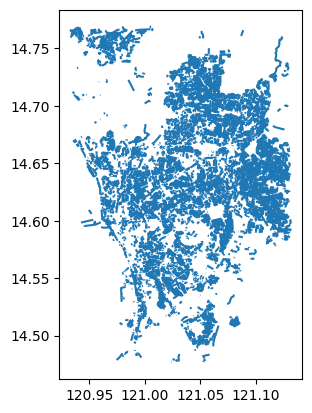

In [77]:
dataset_roads[:10000].plot()

In [78]:
dataset_roads['fclass'].unique()

array(['cycleway', 'primary', 'residential', 'secondary', 'tertiary',
       'motorway', 'trunk', 'primary_link', 'trunk_link', 'service',
       'unclassified', 'footway', 'steps', 'pedestrian', 'secondary_link',
       'motorway_link', 'tertiary_link', 'track', 'path', 'busway',
       'track_grade4', 'living_street', 'bridleway', 'track_grade5',
       'track_grade1'], dtype=object)

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
711,4483587,5122,residential,Zodiac Street,None,B,0,0,F,F,"LINESTRING (121.03515 14.55605, 121.03552 14.5..."
1370,4940456,5122,residential,Recoletos Street,None,B,0,0,F,F,"LINESTRING (121.03432 14.55529, 121.03434 14.5..."
5901,14712757,5113,primary,Kalayaan Overpass,191,F,60,1,T,F,"LINESTRING (121.03568 14.55571, 121.03538 14.5..."
7659,22882909,5115,tertiary,Jupiter Street,None,B,30,0,F,F,"LINESTRING (121.03501 14.55593, 121.03494 14.5..."
23798,28535210,5115,tertiary,Zodiac Street,None,B,30,0,F,F,"LINESTRING (121.03501 14.55593, 121.03485 14.5..."
23859,28538743,5112,trunk,EDSA,1,F,60,0,F,F,"LINESTRING (121.03549 14.55549, 121.03522 14.5..."
23975,28574025,5132,trunk_link,None,None,F,0,1,T,F,"LINESTRING (121.03487 14.55522, 121.03495 14.5..."
29108,29213181,5112,trunk,EDSA,1,F,60,0,F,F,"LINESTRING (121.03508 14.55511, 121.0349 14.55..."
29110,29213301,5113,primary,Kalayaan Overpass,191,F,60,1,T,F,"LINESTRING (121.03447 14.55542, 121.03459 14.5..."
173565,146300437,5113,primary,Senator Gil J. Puyat Avenue,190,F,40,0,F,F,"LINESTRING (121.03507 14.55532, 121.03501 14.5..."


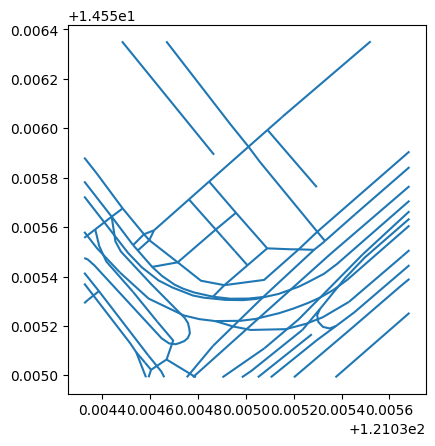

In [79]:
centerx, centery = (121.035004, 14.555672)

offset = 0.00068
minx, miny, maxx, maxy = (centerx - offset, centery - offset, centerx + offset, centery + offset)
bbox = sp.geometry.box(minx, miny, maxx, maxy)

road_patch = dataset_roads.cx[minx:maxx, miny:maxy]
road_patch.loc[:, 'geometry'] = road_patch['geometry'].apply(lambda geom: geom.intersection(bbox))
road_patch = road_patch[~road_patch.is_empty]

road_patch.plot()

road_patch

In [80]:
PATCH_SIZE = 512 # Size of the patches
EARTH_CIRCUFERENCE = 40075016.686 # in meters
SEARCH_INTERVAL = 10  # Distance between interpolated points
SEARCH_RANGE = 10 # pixels the road can be adjusted to find the best fit [coords-SEARCH_RANGE, coords+SEARCH_RANGE]
LINE_LENGTH = 20  # Total length of perpendicular lines
MAX_DISTANCE_FROM_ROAD = 50 # Maximum distance a point can be from a road mask
MAX_ROAD_WIDTH = 150 # Maximum width of a road for it to be considered
LAT_SIZE = 0.0013364 # Estimated degrees per 512 pixels (latitude)
LONG_SIZE = 0.00137216 # Estimated degrees per 512 pixels (longitude)

Display Random Patch

data\roadmasks\13__14.580925_121.030884.png
Random patch path: data\roadmasks\13__14.580925_121.030884.png


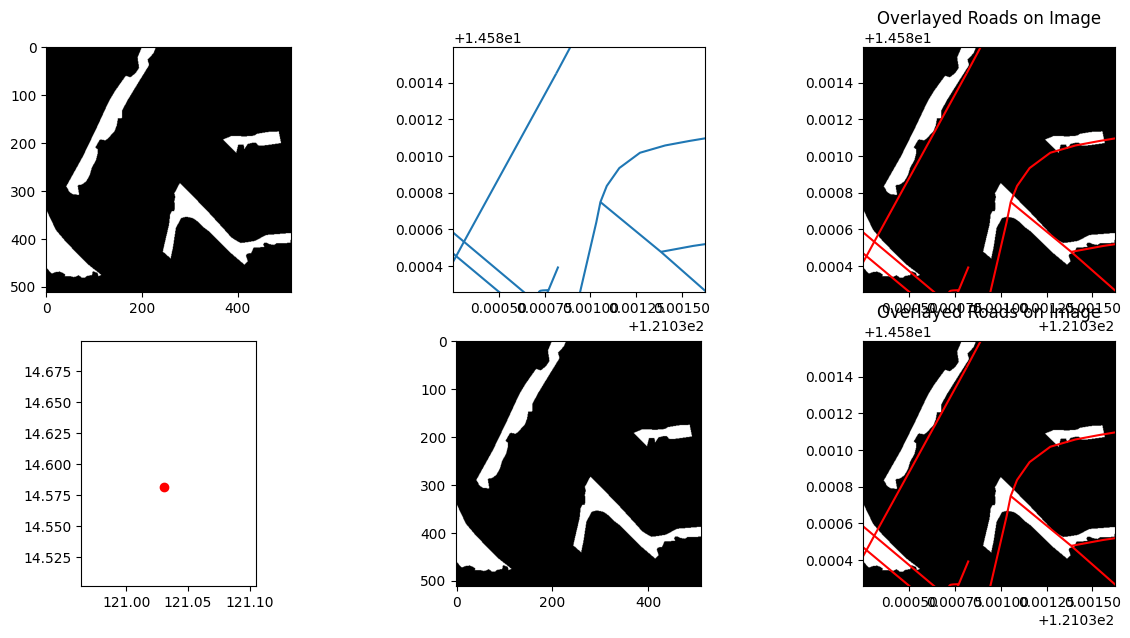

In [81]:
#get file paths
#data\roadimages\3 _ Clear Regular Roads\57__14.557001_121.006165.png
DISPLAY_ALLOWANCE = 0.0000

random_patch_path = Path("data\\roadmasks\\13__14.580925_121.030884.png")
folder_names = ["\\1 _ No Roads", "\\2 _ Roads with Occlusions", "\\3 _ Clear Regular Roads", "\\4 _ Wide Roads"]
mask_path = str(random_patch_path).replace("roadimages", "roadmasks")

#remove folder names from mask paths
for folder_name in folder_names:
    mask_path = mask_path.replace(folder_name, "")
print(mask_path)

#set patch size
lat_size = LAT_SIZE/2
long_size = LONG_SIZE/2
#right = increase lon offset; up = increase lat offset
lat_shift = 0.0000
lon_shift = -0.000053
random_patch_lat = float(random_patch_path.stem.split("_")[-2])
random_patch_lon = float(random_patch_path.stem.split("_")[-1])

#adjust linestring coordinates 
minx, miny, maxx, maxy = (random_patch_lon - long_size, random_patch_lat - lat_size, random_patch_lon + long_size, random_patch_lat + lat_size)
minx = minx - lon_shift
maxx = maxx - lon_shift
miny = miny - lat_shift
maxy = maxy - lat_shift
bbox = sp.geometry.box(minx, miny, maxx, maxy)

#remove roads outside of patch
random_patch_roads = dataset_roads.cx[minx:maxx, miny:maxy]

print("Random patch path:", random_patch_path)

image = cv2.imread(str(random_patch_path))
mask_image = cv2.imread(str(mask_path))

if random_patch_roads.empty:
    print("No roads found in the random patch.")
    plt.imshow(image)
else:

    #show road patch
    fig, axes = plt.subplots(2, 3, figsize=(15, 7))
    axes[0][0].imshow(image)

    #plot linestrings (roadlines)
    random_patch_roads.plot(ax=axes[0][1])

    axes[0][1].set_xlim(minx-DISPLAY_ALLOWANCE, maxx+DISPLAY_ALLOWANCE)
    axes[0][1].set_ylim(miny-DISPLAY_ALLOWANCE, maxy+DISPLAY_ALLOWANCE)
    axes[0][1].set_aspect('equal')

    #overlay linestrings on patch
    axes[0][2].imshow(image, extent=[minx, maxx, miny, maxy])
    random_patch_roads.plot(ax=axes[0][2], color='red')
    axes[0][2].set_title("Overlayed Roads on Image")
    axes[0][2].set_xlim(minx-DISPLAY_ALLOWANCE, maxx+DISPLAY_ALLOWANCE)
    axes[0][2].set_ylim(miny-DISPLAY_ALLOWANCE, maxy+DISPLAY_ALLOWANCE)
    axes[0][2].set_aspect('equal')

    #coordinates relative to total dataset area
    axes[1][0].scatter(random_patch_lon, random_patch_lat, color='red')
    axes[1][0].set_xlim(min_lon, max_lon)
    axes[1][0].set_ylim(min_lat, max_lat)
    axes[1][0].set_aspect('equal')
    
    #ground truth mask
    axes[1][1].imshow(mask_image)

    #overlay linestrings on ground truth mask
    axes[1][2].imshow(mask_image, extent=[minx, maxx, miny, maxy])
    random_patch_roads.plot(ax=axes[1][2], color='red')
    axes[1][2].set_title("Overlayed Roads on Image")
    axes[1][2].set_xlim(minx, maxx)
    axes[1][2].set_ylim(miny, maxy)
    axes[1][2].set_aspect('equal')

    plt.show()


In [82]:
random_patch_roads

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
6903,22000401,5122,residential,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03027 14.58045, 121.03017 14.5..."
6915,22001376,5122,residential,Santo Niño Street,None,B,0,0,F,F,"LINESTRING (121.03309 14.57897, 121.03304 14.5..."
6918,22001498,5122,residential,Santa Ana Street,None,B,0,0,F,F,"LINESTRING (121.03284 14.58104, 121.03267 14.5..."
6919,22001542,5122,residential,San Joaquin Street,None,B,0,0,F,F,"LINESTRING (121.03243 14.58147, 121.03222 14.5..."
550981,616818168,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03031 14.58053, 121.03027 14.5..."
617150,680275201,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03031 14.58053, 121.03081 14.5..."
638927,695757212,5141,service,None,None,B,0,0,F,F,"LINESTRING (121.03082 14.5804, 121.03077 14.58..."
638977,695777124,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03089 14.58004, 121.03079 14.5..."
638978,695777126,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03027 14.58045, 121.03073 14.5..."
639018,695881358,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.02968 14.58096, 121.02973 14.5..."


In [83]:
#create scaled version of cropped linemap to fit mask
# Calculate scaling factors
# Function to scale geometries
def scale_geometry(geom, x_scale, y_scale):
    return sp.affinity.scale(geom, xfact=x_scale, yfact=y_scale, origin=(0,0))

def shift_geometry(geom, x_shift, y_shift):
    return sp.affinity.translate(geom, xoff=-x_shift, yoff=-y_shift)

# Create a copy of the GeoDataFrame and apply scaling to the copy
scaled_patch_roads = random_patch_roads.copy()

scaled_patch_roads["geometry_scaled"] = scaled_patch_roads["geometry"].apply(
    lambda geom: shift_geometry(geom, minx, miny)
)
scaled_patch_roads["geometry_scaled"] = scaled_patch_roads["geometry_scaled"].apply(
    lambda geom: scale_geometry(geom, 512/(maxx-minx), 512/(maxy-miny))
)

x_shift_initial = minx
y_shift_initial = miny
x_scale = 512/(maxx-minx)
y_scale = 512/(maxy-miny)

scaled_patch_roads

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,geometry_scaled
6903,22000401,5122,residential,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03027 14.58045, 121.03017 14.5...","LINESTRING (6.26119 75.09129, -29.89552 9.0032..."
6915,22001376,5122,residential,Santo Niño Street,None,B,0,0,F,F,"LINESTRING (121.03309 14.57897, 121.03304 14.5...","LINESTRING (1059.0597 -491.19665, 1042.30597 -..."
6918,22001498,5122,residential,Santa Ana Street,None,B,0,0,F,F,"LINESTRING (121.03284 14.58104, 121.03267 14.5...","LINESTRING (965.4403 300.25022, 903.68657 251...."
6919,22001542,5122,residential,San Joaquin Street,None,B,0,0,F,F,"LINESTRING (121.03243 14.58147, 121.03222 14.5...","LINESTRING (814.43284 463.15235, 733.83582 395..."
550981,616818168,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03031 14.58053, 121.03027 14.5...","LINESTRING (22.08209 105.24274, 6.26119 75.09129)"
617150,680275201,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03031 14.58053, 121.03081 14.5...","LINESTRING (22.08209 105.24274, 209.76866 456...."
638927,695757212,5141,service,None,None,B,0,0,F,F,"LINESTRING (121.03082 14.5804, 121.03077 14.58...","LINESTRING (214.13433 53.48339, 194.09701 4.13..."
638977,695777124,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03089 14.58004, 121.03079 14.5...","LINESTRING (237.26866 -83.5199, 199.69403 -49...."
638978,695777126,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03027 14.58045, 121.03073 14.5...","LINESTRING (6.26119 75.09129, 179.13433 -73.06..."
639018,695881358,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.02968 14.58096, 121.02973 14.5...","LINESTRING (-214.14925 270.1754, -194.89552 25..."


In [84]:
def get_binary_mask_from_image(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image_mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return np.flipud(image_mask)

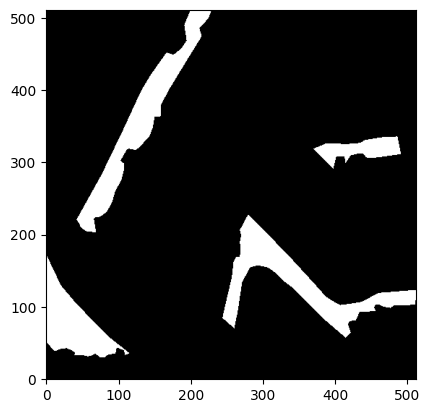

In [85]:
image_mask = get_binary_mask_from_image(mask_image)
plt.imshow(image_mask, cmap='gray')
plt.gca().invert_yaxis()

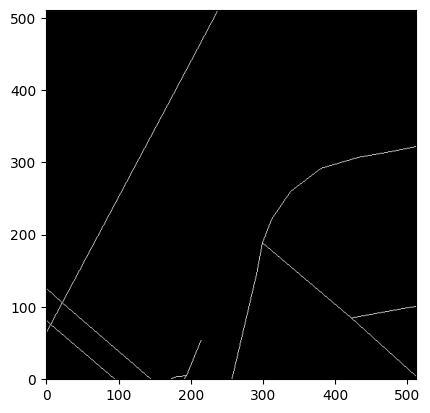

In [86]:
def get_binary_mask_from_roads(scaled_patch_roads):
    road_mask = np.zeros((512, 512), dtype=np.uint8)
    for geom in scaled_patch_roads["geometry_scaled"]:
        if geom.is_empty:
            continue
        if isinstance(geom, sp.LineString):
            coords = np.array(geom.coords, dtype=np.int32)
            cv2.polylines(road_mask, [coords], isClosed=False, color=1, thickness=1)
    return road_mask

road_mask = get_binary_mask_from_roads(scaled_patch_roads)
plt.imshow(road_mask, cmap='gray')
plt.gca().invert_yaxis()


In [87]:
def get_intersection(road_mask, image_mask):
    return np.sum((road_mask > 0) & (image_mask > 0))

In [88]:
shifted_road_masks = [[None for _ in range(2 * SEARCH_RANGE + 1)] for _ in range(2 * SEARCH_RANGE + 1)]

for i in range(-SEARCH_RANGE, SEARCH_RANGE + 1):
    for j in range(-SEARCH_RANGE, SEARCH_RANGE + 1):
        road_copy = scaled_patch_roads.copy()
        road_copy["geometry_scaled"] = road_copy["geometry_scaled"].apply(
            lambda geom: shift_geometry(geom, i, j)
        )
        road_mask = get_binary_mask_from_roads(road_copy)
        shifted_road_masks[i + SEARCH_RANGE][j + SEARCH_RANGE] = road_mask

max_intersection = -1
max_i = -1
max_j = -1

# Iterate through the shifted_road_masks to find the greatest intersection
for i in range(2 * SEARCH_RANGE + 1):
    for j in range(2 * SEARCH_RANGE + 1):
        road_mask = shifted_road_masks[i][j]
        intersection = get_intersection(road_mask, image_mask)
        if intersection > max_intersection:
            max_intersection = intersection
            max_i = i
            max_j = j

best_road_mask = shifted_road_masks[max_i][max_j]

best_shift_values = (max_i - SEARCH_RANGE, max_j - SEARCH_RANGE)


x_shift_second, y_shift_second = best_shift_values[0], best_shift_values[1]

print(f"Maximum intersection: {max_intersection}")
print(f"Shift coordinates: ({max_i - SEARCH_RANGE}, {max_j - SEARCH_RANGE})")

Maximum intersection: 861
Shift coordinates: (10, -10)


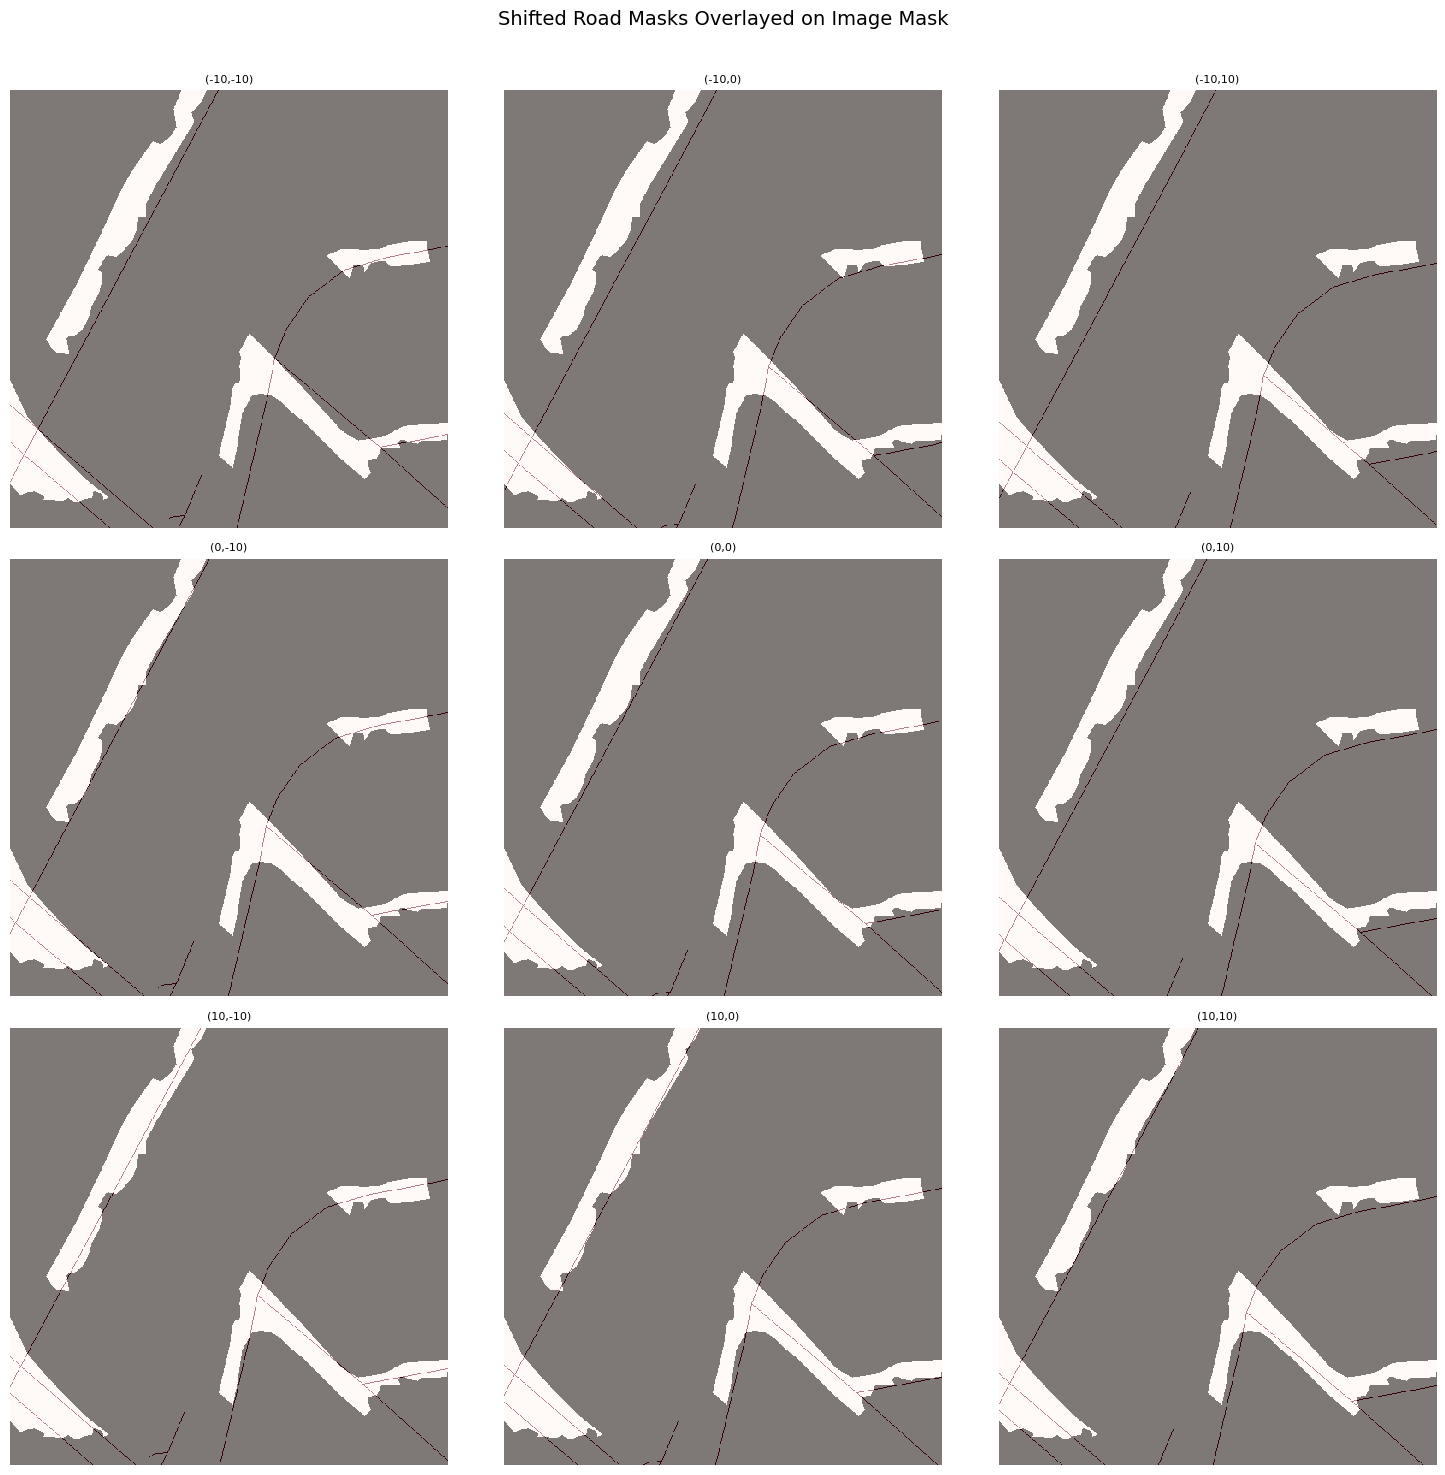

In [89]:
num_display = 3

fig, axes = plt.subplots(num_display, num_display, figsize=(15, 15))
for i in range(num_display):
    for j in range(num_display):
        ax = axes[i, j]
        num = (2 * SEARCH_RANGE)/(num_display-1)
        i_2 = int(i*num)
        j_2 = int(j*num)
        road_mask = shifted_road_masks[i_2][j_2]
        ax.imshow(image_mask, cmap='gray', interpolation='none')
        ax.imshow(road_mask, cmap='Reds', alpha=0.5, interpolation='none')
        ax.set_title(f"({i_2-SEARCH_RANGE},{j_2-SEARCH_RANGE})", fontsize=8)
        ax.axis('off')
        ax.invert_yaxis()
        ax.set_aspect('equal')

plt.suptitle("Shifted Road Masks Overlayed on Image Mask", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

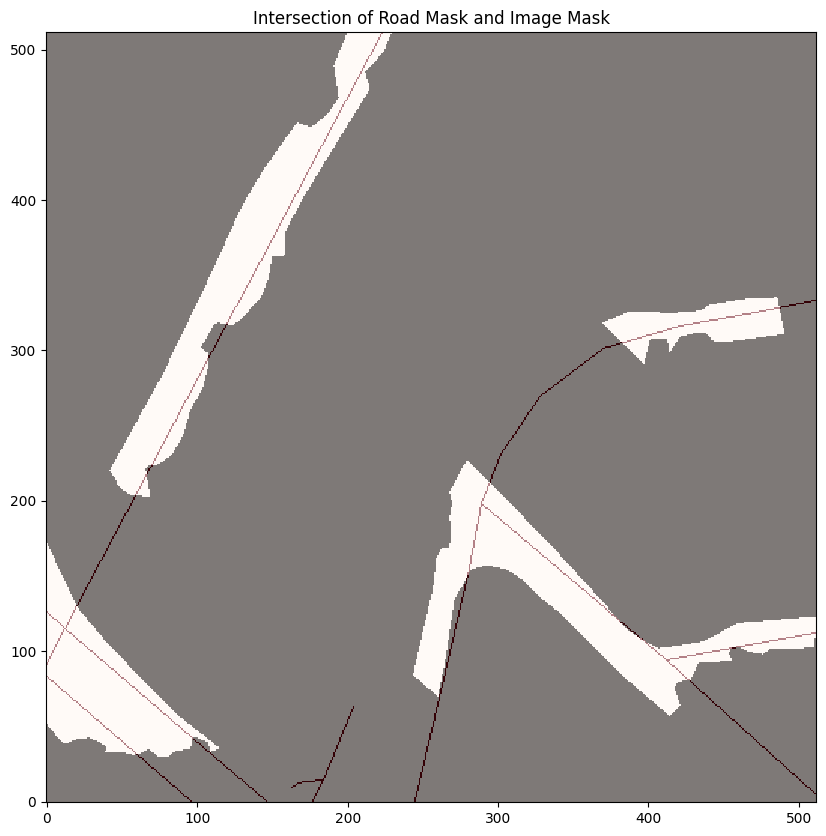

In [90]:
plt.figure(figsize=(10, 10))
plt.imshow(image_mask, cmap='gray', interpolation='none')
plt.imshow(best_road_mask, cmap='Reds', alpha=0.5, interpolation='none')  # Overlay road_mask in red with transparency
plt.title("Intersection of Road Mask and Image Mask")
plt.gca().invert_yaxis()
plt.show()

In [91]:
scaled_patch_roads["geometry_scaled"] = scaled_patch_roads["geometry_scaled"].apply(
    lambda geom: shift_geometry(geom, best_shift_values[0], best_shift_values[1])
)

scaled_patch_roads

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,geometry_scaled
6903,22000401,5122,residential,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03027 14.58045, 121.03017 14.5...","LINESTRING (-3.73881 85.09129, -39.89552 19.00..."
6915,22001376,5122,residential,Santo Niño Street,None,B,0,0,F,F,"LINESTRING (121.03309 14.57897, 121.03304 14.5...","LINESTRING (1049.0597 -481.19665, 1032.30597 -..."
6918,22001498,5122,residential,Santa Ana Street,None,B,0,0,F,F,"LINESTRING (121.03284 14.58104, 121.03267 14.5...","LINESTRING (955.4403 310.25022, 893.68657 261...."
6919,22001542,5122,residential,San Joaquin Street,None,B,0,0,F,F,"LINESTRING (121.03243 14.58147, 121.03222 14.5...","LINESTRING (804.43284 473.15235, 723.83582 405..."
550981,616818168,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03031 14.58053, 121.03027 14.5...","LINESTRING (12.08209 115.24274, -3.73881 85.09..."
617150,680275201,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03031 14.58053, 121.03081 14.5...","LINESTRING (12.08209 115.24274, 199.76866 466...."
638927,695757212,5141,service,None,None,B,0,0,F,F,"LINESTRING (121.03082 14.5804, 121.03077 14.58...","LINESTRING (204.13433 63.48339, 184.09701 14.1..."
638977,695777124,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03089 14.58004, 121.03079 14.5...","LINESTRING (227.26866 -73.5199, 189.69403 -39...."
638978,695777126,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03027 14.58045, 121.03073 14.5...","LINESTRING (-3.73881 85.09129, 169.13433 -63.0..."
639018,695881358,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.02968 14.58096, 121.02973 14.5...","LINESTRING (-224.14925 280.1754, -204.89552 26..."


In [92]:
def interpolate_points(line, distance_interval):
    length = line.length
    num_points = math.ceil(length / distance_interval)
    distances = [i * distance_interval for i in range(num_points + 1)]
    points = [line.interpolate(distance) for distance in distances]
    #remove points that are out of bounds
    points = [point for point in points if point.x >= 0 and point.x < 512 and point.y >= 0 and point.y < 512]
    return points

In [93]:
def perpendicular_line_eq(line, point):
    coords = list(line.coords)

    for i in range(len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i + 1]
        segment = sp.LineString([(x1, y1), (x2, y2)])

        if segment.distance(point) <= 1e-7:  # Check if point is close to the segment
            # Compute original slope
            if x2 - x1 == 0:  # Vertical line
                return (0, point.y)
            elif y2 - y1 == 0:  # Horizontal line
                return (float('inf'), point.x)
            
            slope = (y2 - y1) / (x2 - x1)
            perp_slope = -1 / slope  # Perpendicular slope

            x, y = point.x, point.y
            b = y - perp_slope * x

            return (perp_slope, b)
    
    return None

In [94]:
#gets point slope pairs of a road line
def compute_points_and_perpendiculars(road_line, distance_interval):
    point_slope_pairs = []
    points = interpolate_points(road_line, distance_interval)
    for point in points:
                perp_result = perpendicular_line_eq(road_line, point)
                if perp_result is not None:
                    slope, intercept = perp_result
                    point_slope_pairs.append((point, slope))
    return point_slope_pairs
    

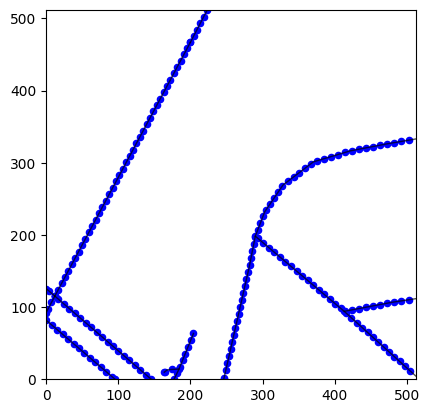

In [95]:
bbox = sp.geometry.box(0, 0, 512, 512)
scaled_patch_roads['geometry_scaled'] = scaled_patch_roads['geometry_scaled'].clip(bbox)
scaled_patch_roads = scaled_patch_roads[scaled_patch_roads['geometry_scaled'].notnull()]
point_line_eq = []
for road in scaled_patch_roads['geometry_scaled'].items():
    geom = road[1]
    
    if isinstance(geom, sp.MultiLineString):
        for line in geom.geoms:
            # Plot the line being interpolated
            x, y = line.xy
            plt.plot(x, y, color='black', linewidth=1, alpha=0.7)
            point_slope_pairs = compute_points_and_perpendiculars(line, SEARCH_INTERVAL)
            for point_slope_pair in point_slope_pairs:
                point, slope = point_slope_pair
                # if slope == float('inf'):
                #     x1, x2 = point.x, point.x
                #     y1, y2 = point.y - LINE_LENGTH / 2, point.y + LINE_LENGTH / 2
                #     plt.plot([x1, x2], [y1, y2], color='red')
                # else:
                #     dx = LINE_LENGTH / (2 * (1 + slope ** 2) ** 0.5)
                #     dy = slope * dx
                #     x1, y1 = point.x - dx, point.y - dy
                #     x2, y2 = point.x + dx, point.y + dy
                #     plt.plot([x1, x2], [y1, y2], color='red')
                plt.scatter(point.x, point.y, color='blue', s=20)
    elif isinstance(geom, sp.LineString):
        x, y = geom.xy
        plt.plot(x, y, color='black', linewidth=1, alpha=0.7)
        point_slope_pairs = compute_points_and_perpendiculars(geom, SEARCH_INTERVAL)
        for point_slope_pair in point_slope_pairs:
            point, slope = point_slope_pair
            point, slope = point_slope_pair
            # if slope == float('inf'):
            #     x1, x2 = point.x
            #     y1, y2 = point.y - LINE_LENGTH / 2, point.y + LINE_LENGTH / 2
            #     plt.plot([x1, x2], [y1, y2], color='red')
            # else:
            #     dx = LINE_LENGTH / (2 * (1 + slope ** 2) ** 0.5)
            #     dy = slope * dx
            #     x1, y1 = point.x - dx, point.y - dy
            #     x2, y2 = point.x + dx, point.y + dy
            #     plt.plot([x1, x2], [y1, y2], color='red')
            plt.scatter(point.x, point.y, color='blue', s=20)

plt.xlim(0, 512)
plt.ylim(0, 512)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [96]:
scaled_patch_roads

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,geometry_scaled
6915,22001376,5122,residential,Santo Niño Street,None,B,0,0,F,F,"LINESTRING (121.03309 14.57897, 121.03304 14.5...","LINESTRING (512 4.60623, 412.97761 94.13289, 2..."
6918,22001498,5122,residential,Santa Ana Street,None,B,0,0,F,F,"LINESTRING (121.03284 14.58104, 121.03267 14.5...","LINESTRING (512 111.61975, 478.35075 106.50763..."
6919,22001542,5122,residential,San Joaquin Street,None,B,0,0,F,F,"LINESTRING (121.03243 14.58147, 121.03222 14.5...","LINESTRING (512 332.89015, 471.07463 325.91978..."
550981,616818168,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03031 14.58053, 121.03027 14.5...","LINESTRING (12.08209 115.24274, 0 92.2167)"
617150,680275201,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03031 14.58053, 121.03081 14.5...","LINESTRING (12.08209 115.24274, 199.76866 466...."
638927,695757212,5141,service,None,None,B,0,0,F,F,"LINESTRING (121.03082 14.5804, 121.03077 14.58...","LINESTRING (204.13433 63.48339, 184.09701 14.1..."
638977,695777124,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03089 14.58004, 121.03079 14.5...","LINESTRING (145.68492 0, 12.08209 115.24274)"
638978,695777126,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03027 14.58045, 121.03073 14.5...","LINESTRING (0 81.88714, 95.55107 0)"
715637,771352867,5114,secondary,Boni Avenue,None,F,40,0,F,F,"LINESTRING (121.03031 14.58053, 121.02999 14.5...","LINESTRING (12.08209 115.24274, 0 125.72953)"
719505,776324539,5115,tertiary,San Rafael Street,None,B,0,0,F,F,"LINESTRING (121.03081 14.58145, 121.03098 14.5...","LINESTRING (199.76866 466.56271, 223.39273 512)"


In [97]:
def graph_measurements(points_forward, points_backward, image_mask, point, returned_distance=None):
    plt.imshow(image_mask, cmap='gray')
    x, y = int(point.x), int(point.y)
    plt.scatter(x, y, color='red', label='Start Point', edgecolors='black', marker='o')
    if points_forward:
        plt.scatter(*zip(*points_forward), color='blue', label='Forward Boundary', edgecolors='black', marker='x')
    if points_backward:
        plt.scatter(*zip(*points_backward), color='green', label='Backward Boundary', edgecolors='black', marker='s')
    plt.gca().invert_yaxis()
    plt.legend()

    if(returned_distance is not None):
        if returned_distance == "forward":
            x_vals = [points_forward[0][0], points_forward[1][0]]
            y_vals = [points_forward[0][1], points_forward[1][1]]
        elif returned_distance == "backward":
            x_vals = [points_backward[0][0], points_backward[1][0]]
            y_vals = [points_backward[0][1], points_backward[1][1]]
        elif returned_distance == "inside":
            x_vals = [points_forward[0][0], points_backward[0][0]]
            y_vals = [points_forward[0][1], points_backward[0][1]]
        plt.plot(x_vals, y_vals, color='orange', linewidth=2, label='Width Line')
    plt.show()

In [98]:
import math
import matplotlib.pyplot as plt

def measure_nearest_road_to_point(point, slope, image_mask, plot=True):
    min_distance = 2
    x, y = int(point.x), int(point.y)
    width, height = image_mask.shape  # Fix: Ensure correct order (height, width)

    # Check if the point is inside the image bounds
    if not (0 <= x < width and 0 <= y < height):
        return None  # Ensure point is within bounds

    search_mode = "inside" if image_mask[y, x] == 255 else "outside"
    points_forward = []
    points_backward = []

    if slope == float('inf'):  # **Vertical case**
        # Move upward (-y direction)
        found_white = False
        for i in range(y - 1, -1, -1):
            if search_mode == "inside" and (image_mask[i, x] == 0 or i == 0 or i == height - 1):
                points_backward.append((x, i))
                break
            if search_mode == "outside":
                if image_mask[i, x] == 255 and not found_white:
                    points_backward.append((x, i))
                    found_white = True
                    continue
                if found_white and image_mask[i, x] == 0:
                    points_backward.append((x, i))
                    break

        # Move downward (+y direction)
        found_white = False
        for i in range(y + 1, height):
            if search_mode == "inside" and (image_mask[i, x] == 0 or i == 0 or i == height - 1):
                points_forward.append((x, i))
                break
            if search_mode == "outside":
                if image_mask[i, x] == 255 and not found_white:
                    points_forward.append((x, i))
                    found_white = True
                    continue
                if found_white and image_mask[i, x] == 0:
                    points_forward.append((x, i))
                    break

    else:  # **Non-vertical case (diagonal/horizontal)**
        step_size = 1 / max(abs(slope), 1)  # Normalize step size
        dx = step_size if slope >= 0 else -step_size
        dy = slope * dx

        # Move forward
        xi, yi = x + dx, y + dy
        found_white = False
        while 0 <= int(round(xi)) < width and 0 <= int(round(yi)) < height:
            if search_mode == "inside" and (image_mask[int(round(yi)), int(round(xi))] == 0 or int(round(xi)) == 0 or int(round(xi)) == width - 1 or int(round(yi)) == 0 or int(round(yi)) == height - 1):
                points_forward.append((int(round(xi)), int(round(yi))))
                break
            if search_mode == "outside":
                if image_mask[int(round(yi)), int(round(xi))] == 255 and not found_white:
                    points_forward.append((int(round(xi)), int(round(yi))))
                    found_white = True
                    xi += dx
                    yi += dy
                    continue
                if found_white and image_mask[int(round(yi)), int(round(xi))] == 0:
                    points_forward.append((int(round(xi)), int(round(yi))))
                    break
            xi += dx
            yi += dy

        # Move backward
        xi, yi = x - dx, y - dy
        found_white = False
        while 0 <= int(round(xi)) < width and 0 <= int(round(yi)) < height:
            if search_mode == "inside" and (image_mask[int(round(yi)), int(round(xi))] == 0 or int(round(xi)) == 0 or int(round(xi)) == width - 1 or int(round(yi)) == 0 or int(round(yi)) == height - 1):
                points_backward.append((int(round(xi)), int(round(yi))))
                break
            if search_mode == "outside":
                if image_mask[int(round(yi)), int(round(xi))] == 255 and not found_white:
                    points_backward.append((int(round(xi)), int(round(yi))))
                    found_white = True
                    xi -= dx
                    yi -= dy
                    continue
                if found_white and image_mask[int(round(yi)), int(round(xi))] == 0:
                    points_backward.append((int(round(xi)), int(round(yi))))
                    break
            xi -= dx
            yi -= dy

    # **Return total measured width**
    returned_distance = None
    returned_value = None

    if search_mode == "inside":
        if points_forward and points_backward:
            total_dist = math.dist((point.x, point.y), points_forward[0]) + math.dist((point.x, point.y), points_backward[0])
            if total_dist > MAX_ROAD_WIDTH:
                return None
            returned_value = total_dist
            returned_distance = "inside"
    else:
        forward_dist = math.dist(points_forward[0], points_forward[1]) if len(points_forward) > 1 else None
        backward_dist = math.dist(points_backward[0], points_backward[1]) if len(points_backward) > 1 else None
        if forward_dist is not None and forward_dist > MAX_ROAD_WIDTH:
            forward_dist = None
        if backward_dist is not None and backward_dist > MAX_ROAD_WIDTH:
            backward_dist = None

        if forward_dist is not None and backward_dist is not None:
            if math.dist((point.x, point.y), points_forward[0]) < math.dist((point.x, point.y), points_backward[0]) and math.dist((point.x, point.y), points_forward[0]) < MAX_DISTANCE_FROM_ROAD and forward_dist > 1.1:
                returned_value = forward_dist
                returned_distance = "forward"
            elif math.dist((point.x, point.y), points_backward[0]) < MAX_DISTANCE_FROM_ROAD and backward_dist > 1.1:
                returned_value = backward_dist
                returned_distance = "backward"
        elif forward_dist is not None and forward_dist > 1.1 and math.dist((point.x, point.y), points_forward[0]) < MAX_DISTANCE_FROM_ROAD:
            returned_value = forward_dist
            returned_distance = "forward"
        elif backward_dist is not None and backward_dist > 1.1 and math.dist((point.x, point.y), points_backward[0]) < MAX_DISTANCE_FROM_ROAD:
            returned_value = backward_dist
            returned_distance = "backward"

    if plot:
        graph_measurements(points_forward, points_backward, image_mask, point, returned_distance)

    return returned_value

In [99]:
def convert_coords(point_i):
    point = shift_geometry(point_i, -x_shift_second, -y_shift_second)
    point = scale_geometry(point, 1/x_scale, 1/y_scale)
    point = shift_geometry(point, -x_shift_initial, -y_shift_initial)
    return point

In [100]:
#get width measurements of one road line
def measure_road_width(line,  image_mask, plot=False):
    point_slope_pairs = compute_points_and_perpendiculars(line, SEARCH_INTERVAL)
    widths = []
    for point_slope_pair in point_slope_pairs:
        point, slope = point_slope_pair
        width = measure_nearest_road_to_point((point), slope, image_mask, plot=plot)
        coords = convert_coords(point)
        if width is not None:
            widths.append((point_slope_pair, coords, width))
    return widths

In [101]:
test = scaled_patch_roads.copy()
print(test["geometry"].iloc[0])
point = sp.Point(test["geometry_scaled"].iloc[0].coords[0])
print(convert_coords(point))

LINESTRING (121.0330892 14.5789747, 121.0330443 14.5790335, 121.0318851 14.5800356, 121.0313845 14.5804764, 121.0310544 14.5807481)
POINT (121.03164987999999 14.580242721406321)


C:\Users\rafae_ls0opq0\AppData\Local\Temp\ipykernel_3900\2575040778.py:6: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*zip(*points_forward), color='blue', label='Forward Boundary', edgecolors='black', marker='x')


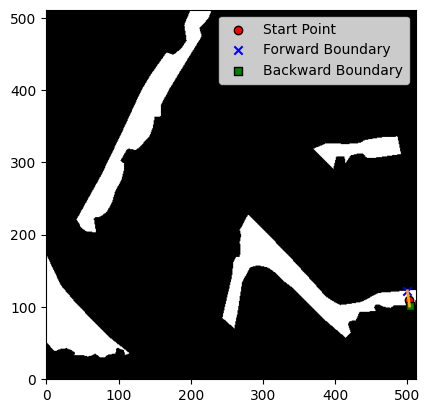

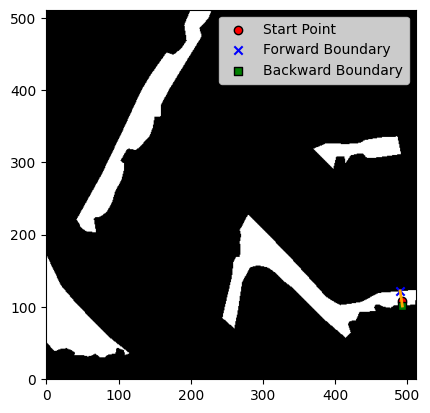

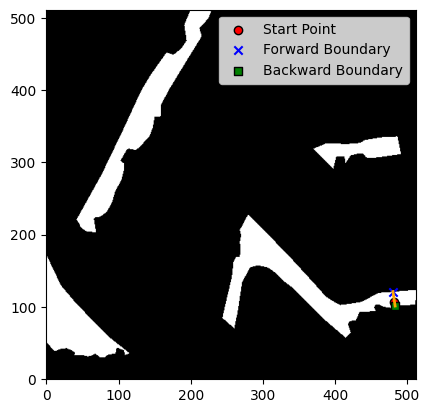

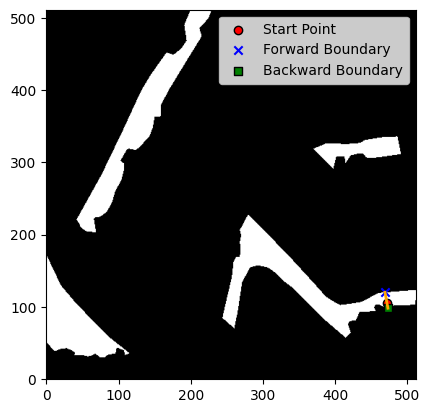

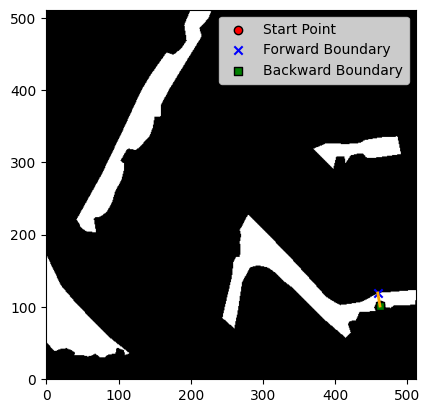

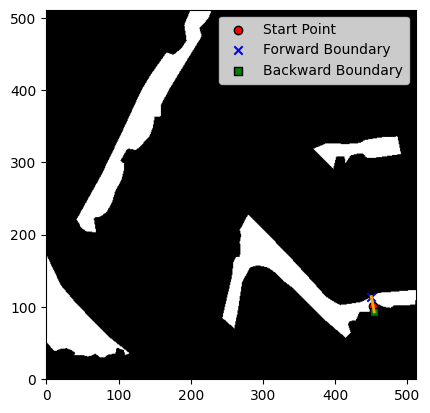

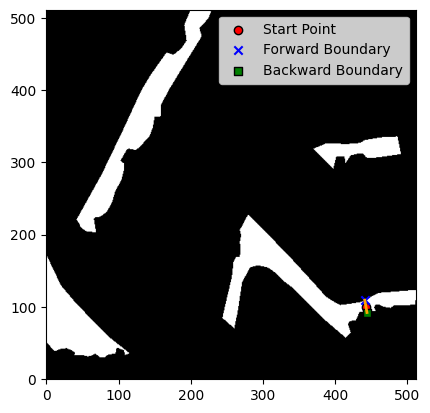

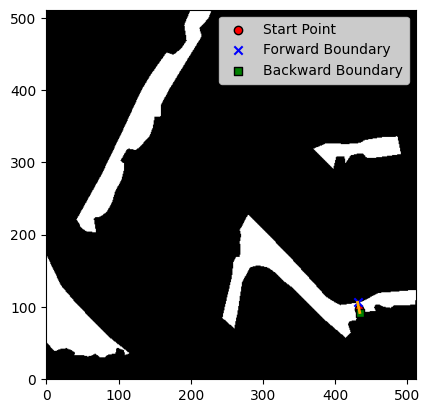

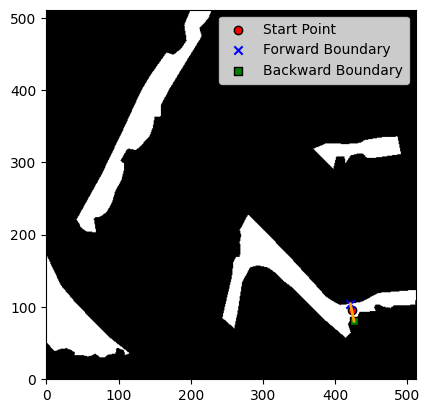

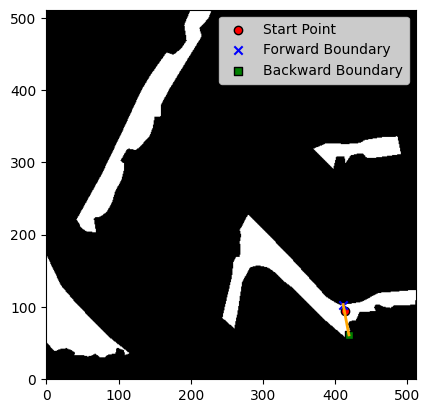

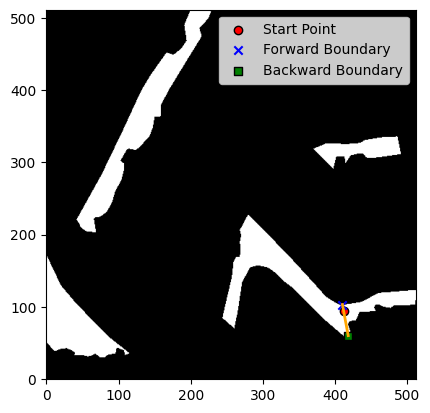

Average road width: 24.35 pixels


In [102]:
instance = scaled_patch_roads.iloc[1]
geom = instance['geometry_scaled']

if isinstance(geom, sp.MultiLineString):
    for line in geom.geoms:
        widths = measure_road_width(line, image_mask, True)
elif isinstance(geom, sp.LineString):
    widths = measure_road_width(geom, image_mask, True)

average_width = np.mean([width for _, _, width in widths])
print(f"Average road width: {average_width:.2f} pixels")

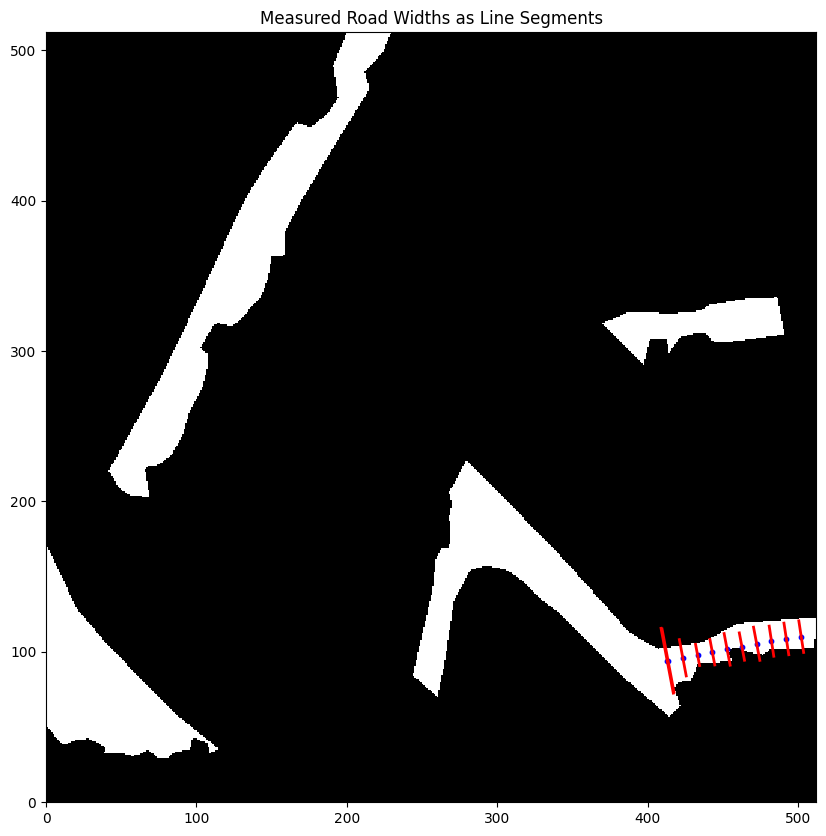

In [103]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_mask, cmap='gray', interpolation='none')

for width_info in widths:
    (point, slope), coords, width = width_info
    x0, y0 = point.x, point.y

    # Calculate dx, dy for the perpendicular line segment
    if slope == float('inf'):
        dx, dy = 0, width / 2
    elif slope == 0:
        dx, dy = width / 2, 0
    else:
        dx = (width / 2) / (1 + slope ** 2) ** 0.5
        dy = slope * dx 

    # Endpoints of the width segment
    x1, y1 = x0 - dx, y0 - dy
    x2, y2 = x0 + dx, y0 + dy

    ax.plot([x1, x2], [y1, y2], color='red', linewidth=2)
    ax.scatter([x0], [y0], color='blue', s=10)  # Mark the center point

ax.set_xlim(0, 512)
ax.set_ylim(0, 512)
ax.set_aspect('equal')
ax.set_title("Measured Road Widths as Line Segments")
plt.show()

In [104]:
def get_patch_road_widths(roads, image_mask):
    road_widths = []
    for road in roads.itertuples():
        geom = road.geometry_scaled
        osm_id = road.osm_id
        if isinstance(geom, sp.MultiLineString):
            for line in geom.geoms:
                widths = measure_road_width(line, image_mask)
                road_widths.append((osm_id, widths))
        elif isinstance(geom, sp.LineString):
            widths = measure_road_width(geom, image_mask)
            road_widths.append((osm_id, widths))
    return road_widths

In [105]:
def get_patch_road_widths_df(roads, image_mask):
    road_widths = []
    for road in roads.itertuples():
        geom = road.geometry_scaled
        osm_id = road.osm_id
        if isinstance(geom, sp.MultiLineString):
            for line in geom.geoms:
                widths = measure_road_width(line, image_mask)
                for point_slope_pair, coords, width in widths:
                    point, slope = point_slope_pair
                    road_widths.append({
                        'osm_id': osm_id,
                        'coordinates_on_image': point,
                        'map_coordinates': coords,
                        'slope': slope,
                        'width': width
                    })
        elif isinstance(geom, sp.LineString):
            widths = measure_road_width(geom, image_mask)
            for point_slope_pair, coords, width in widths:
                point, slope = point_slope_pair
                road_widths.append({
                    'osm_id': osm_id,
                    'coordinates_on_image': point,
                    'map_coordinates': coords,
                    'slope': slope,
                    'width': width
                })
    return pd.DataFrame(road_widths)


In [106]:
patch_road_widths = get_patch_road_widths(scaled_patch_roads, image_mask)
patch_road_widths

[('22001376',
  [((<POINT (445.24 64.964)>, 1.1060658188882886),
    <POINT (121.031 14.58)>,
    31.89043743820395),
   ((<POINT (437.822 71.671)>, 1.1060658188882886),
    <POINT (121.031 14.58)>,
    26.90724809414742),
   ((<POINT (430.404 78.377)>, 1.1060658188882886),
    <POINT (121.031 14.58)>,
    12.041594578792296),
   ((<POINT (422.987 85.084)>, 1.1060658188882886),
    <POINT (121.031 14.58)>,
    63.05109346949293),
   ((<POINT (415.569 91.79)>, 1.1060658188882886),
    <POINT (121.031 14.58)>,
    46.01458693496737),
   ((<POINT (408.008 98.333)>, 1.1832802011293542),
    <POINT (121.031 14.58)>,
    34.05887944329402),
   ((<POINT (400.37 104.788)>, 1.1832802011293542),
    <POINT (121.031 14.581)>,
    29.16316131164048),
   ((<POINT (392.732 111.242)>, 1.1832802011293542),
    <POINT (121.031 14.581)>,
    24.839484696748443),
   ((<POINT (385.095 117.697)>, 1.1832802011293542),
    <POINT (121.031 14.581)>,
    24.839484696748443),
   ((<POINT (377.457 124.152)>, 1.1

In [107]:
patch_road_widths_df = get_patch_road_widths_df(scaled_patch_roads, image_mask)
patch_road_widths_df

,osm_id,coordinates_on_image,map_coordinates,slope,width
0,22001376,POINT (445.2399770015468 64.96431820001467),POINT (121.03147096313836 14.580400265458678),1.106066,31.890437
1,22001376,POINT (437.8221966683853 71.67077292132332),POINT (121.03145108348706 14.580417770353383),1.106066,26.907248
2,22001376,POINT (430.40441633522386 78.37722764263196),POINT (121.03143120383577 14.58043527524809),1.106066,12.041595
3,22001376,POINT (422.98663600206237 85.0836823639406),POINT (121.03141132418448 14.580452780142796),1.106066,63.051093
4,22001376,POINT (415.5688556689009 91.79013708524924),POINT (121.03139144453318 14.580470285037503),1.106066,46.014587
...,...,...,...,...,...
125,776324539,POINT (204.38167355907606 475.4351392442656),POINT (121.03082546288513 14.581471658437668),-0.519927,23.763766
126,776324539,POINT (208.99469039888032 484.30757271179203),POINT (121.03083782577026 14.581494816875336),-0.519927,25.178645
127,776324539,POINT (213.60770723868455 493.1800061793184),POINT (121.03085018865539 14.581517975313004),-0.519927,25.115846
128,776324539,POINT (218.22072407848881 502.0524396468448),POINT (121.03086255154052 14.581541133750672),-0.519927,27.304653


In [108]:
def generate_width_statistics(patch_road_widths_df):
    width_stats = patch_road_widths_df.groupby('osm_id')['width'].describe()
    return width_stats

In [109]:
width_statistics = generate_width_statistics(patch_road_widths_df)
width_statistics

,count,mean,std,min,25%,50%,75%,max
osm_id,,,,,,,,
22001376,22.0,36.698206,16.704042,12.041595,26.420541,30.860506,43.732656,83.737839
22001498,11.0,24.352258,9.767488,14.347443,19.372630,21.229491,23.494573,43.854120
22001542,28.0,27.055266,18.615247,2.236068,17.433365,21.715991,28.581337,84.539927
616818168,3.0,87.272067,31.984180,57.251349,70.452180,83.653010,102.282426,120.911842
680275201,33.0,29.806279,9.269031,9.848858,28.188585,31.889367,34.000028,58.601970
695777124,14.0,42.562950,20.557093,3.605551,31.945630,46.804343,56.547473,68.780767
695777126,11.0,44.547172,21.193128,2.828427,32.596306,50.331154,59.929770,69.529014
771352867,2.0,30.158149,5.516361,26.257492,28.207820,30.158149,32.108477,34.058805
776324539,6.0,21.135845,7.174419,8.323335,18.787560,24.439806,25.162946,27.304653


In [110]:
#calculate m per pixel: https://wiki.openstreetmap.org/wiki/Zoom_levels
def meters_per_pixel(lat):
    return EARTH_CIRCUFERENCE * abs(math.cos(math.radians(lat))) / (512 * (2 ** 18))

In [111]:
avg_m_per_pixel = (meters_per_pixel(min_lat) + meters_per_pixel(max_lat)) / 2
(1/avg_m_per_pixel)

3.460925935231014

In [112]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape

data_makati = gpd.read_file("data/footprints/Makati Polygons v3.2.geojson")
data_manila = gpd.read_file("data/footprints/Manila_polygons_v3.geojson")
data_mandaluyong = gpd.read_file("data/footprints/Mandaluyong Polygon v3.geojson")

combined_data = gpd.GeoDataFrame(pd.concat([data_makati, data_manila, data_mandaluyong], ignore_index=True))

In [113]:
combined_data = combined_data['geometry']
combined_data

0        MULTIPOLYGON (((121.0309 14.56083, 121.03087 1...
1        MULTIPOLYGON (((121.02055 14.55521, 121.02055 ...
2        MULTIPOLYGON (((121.02418 14.54927, 121.02427 ...
3        MULTIPOLYGON (((121.02705 14.5628, 121.02705 1...
4        MULTIPOLYGON (((121.01556 14.5394, 121.01552 1...
                               ...                        
64642    MULTIPOLYGON (((121.03674 14.58929, 121.03682 ...
64643    MULTIPOLYGON (((121.02996 14.59323, 121.03002 ...
64644    MULTIPOLYGON (((121.04242 14.58867, 121.04218 ...
64645    MULTIPOLYGON (((121.0449 14.5879, 121.04547 14...
64646    MULTIPOLYGON (((121.04527 14.58734, 121.04529 ...
Name: geometry, Length: 64647, dtype: geometry

<Axes: >

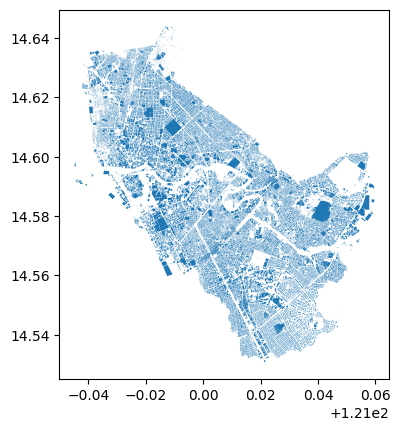

In [114]:
combined_data.plot()

In [115]:
#get file paths
#data\roadimages\3 _ Clear Regular Roads\57__14.557001_121.006165.png
DISPLAY_ALLOWANCE = 0.0000

random_patch_path = random.choice(file_paths)
#random_patch_path = Path("data\\roadmasks\\30__14.554343_121.002045.png")
#random_patch_path = Path("data\\roadmasks\\70__14.598202_121.051483.png")
random_patch_path = Path("data\\roadmasks\\13__14.580925_121.030884.png")
folder_names = ["\\1 _ No Roads", "\\2 _ Roads with Occlusions", "\\3 _ Clear Regular Roads", "\\4 _ Wide Roads"]
mask_path = str(random_patch_path).replace("roadimages", "roadmasks")

#remove folder names from mask paths
for folder_name in folder_names:
    mask_path = mask_path.replace(folder_name, "")
print(mask_path)

#set patch size
lat_size = LAT_SIZE/2
long_size = LONG_SIZE/2
#right = increase lon offset; up = increase lat offset
lat_shift = 0.0000
lon_shift = -0.000053
random_patch_lat = float(random_patch_path.stem.split("_")[-2])
random_patch_lon = float(random_patch_path.stem.split("_")[-1])

#adjust linestring coordinates 
minx, miny, maxx, maxy = (random_patch_lon - long_size, random_patch_lat - lat_size, random_patch_lon + long_size, random_patch_lat + lat_size)
minx = minx - lon_shift
maxx = maxx - lon_shift
miny = miny - lat_shift
maxy = maxy - lat_shift
bbox = sp.geometry.box(minx, miny, maxx, maxy)

area_roads = combined_data.cx[minx:maxx, miny:maxy]
area_roads

data\roadmasks\13__14.580925_121.030884.png


54522    MULTIPOLYGON (((121.0321 14.5813, 121.03198 14...
54910    MULTIPOLYGON (((121.03158 14.58132, 121.03158 ...
55022    MULTIPOLYGON (((121.03078 14.58069, 121.03079 ...
55204    MULTIPOLYGON (((121.03153 14.58127, 121.03153 ...
55303    MULTIPOLYGON (((121.03134 14.58069, 121.03122 ...
55626    MULTIPOLYGON (((121.02989 14.58096, 121.02994 ...
55769    MULTIPOLYGON (((121.03128 14.58143, 121.0314 1...
55851    MULTIPOLYGON (((121.03129 14.58145, 121.03129 ...
56011    MULTIPOLYGON (((121.03141 14.5814, 121.03141 1...
56012    MULTIPOLYGON (((121.03143 14.58101, 121.03143 ...
56120    MULTIPOLYGON (((121.03101 14.5803, 121.03105 1...
56246    MULTIPOLYGON (((121.03093 14.58046, 121.03077 ...
56502    MULTIPOLYGON (((121.03096 14.58057, 121.03087 ...
56529    MULTIPOLYGON (((121.03135 14.58062, 121.03131 ...
56620    MULTIPOLYGON (((121.03164 14.58132, 121.03165 ...
56838    MULTIPOLYGON (((121.03154 14.5807, 121.03155 1...
57026    MULTIPOLYGON (((121.0315 14.58059, 121.03146 1.

In [116]:
print("Min X:", minx)
print("Min Y:", miny)
print("Max X:", maxx)
print("Max Y:", maxy)

Min X: 121.03025092
Min Y: 14.5802568
Max X: 121.03162307999999
Max Y: 14.5815932


In [117]:
area_roads = combined_data.cx[minx:maxx, miny:maxy]
area_roads

54522    MULTIPOLYGON (((121.0321 14.5813, 121.03198 14...
54910    MULTIPOLYGON (((121.03158 14.58132, 121.03158 ...
55022    MULTIPOLYGON (((121.03078 14.58069, 121.03079 ...
55204    MULTIPOLYGON (((121.03153 14.58127, 121.03153 ...
55303    MULTIPOLYGON (((121.03134 14.58069, 121.03122 ...
55626    MULTIPOLYGON (((121.02989 14.58096, 121.02994 ...
55769    MULTIPOLYGON (((121.03128 14.58143, 121.0314 1...
55851    MULTIPOLYGON (((121.03129 14.58145, 121.03129 ...
56011    MULTIPOLYGON (((121.03141 14.5814, 121.03141 1...
56012    MULTIPOLYGON (((121.03143 14.58101, 121.03143 ...
56120    MULTIPOLYGON (((121.03101 14.5803, 121.03105 1...
56246    MULTIPOLYGON (((121.03093 14.58046, 121.03077 ...
56502    MULTIPOLYGON (((121.03096 14.58057, 121.03087 ...
56529    MULTIPOLYGON (((121.03135 14.58062, 121.03131 ...
56620    MULTIPOLYGON (((121.03164 14.58132, 121.03165 ...
56838    MULTIPOLYGON (((121.03154 14.5807, 121.03155 1...
57026    MULTIPOLYGON (((121.0315 14.58059, 121.03146 1.

<Axes: >

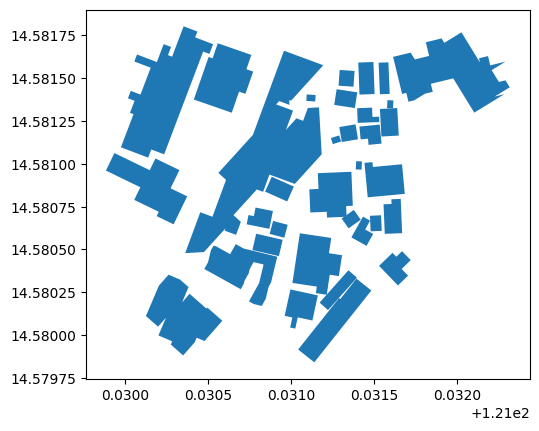

In [118]:
area_roads.plot()

<Axes: >

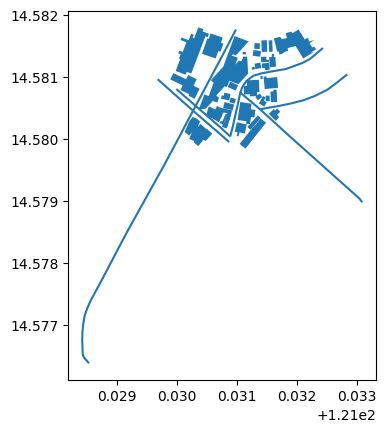

In [119]:
random_patch_roads = dataset_roads.cx[minx:maxx, miny:maxy]
random_patch_roads_geom = random_patch_roads['geometry']
combined_graphs = pd.concat([area_roads, random_patch_roads_geom], ignore_index=True)
combined_graphs.plot()

<Axes: >

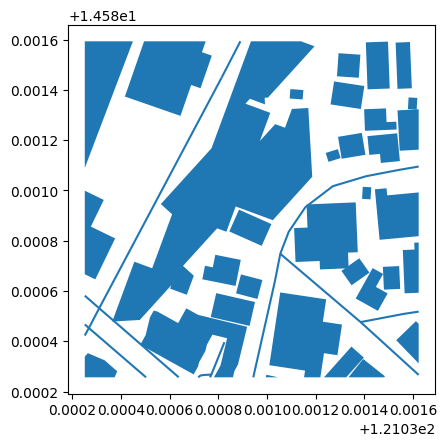

In [123]:
clipped = combined_graphs.clip(bbox)
clipped.plot()

In [126]:
clipped

34    LINESTRING (121.03027 14.58045, 121.03025 14.5...
19    POLYGON ((121.03026 14.58035, 121.03033 14.580...
42    LINESTRING (121.03027 14.58045, 121.0305 14.58...
46    LINESTRING (121.03077 14.58027, 121.03074 14.5...
41    LINESTRING (121.03064 14.58026, 121.03031 14.5...
40    LINESTRING (121.03082 14.5804, 121.03077 14.58...
20    POLYGON ((121.03081 14.5803, 121.03084 14.5804...
38    LINESTRING (121.03031 14.58053, 121.03027 14.5...
44    LINESTRING (121.03031 14.58053, 121.03025 14.5...
2     POLYGON ((121.03079 14.58074, 121.03089 14.580...
35    LINESTRING (121.03162 14.58027, 121.03138 14.5...
24    POLYGON ((121.03153 14.5804, 121.03161 14.5804...
16    POLYGON ((121.03146 14.58052, 121.03136 14.580...
15    POLYGON ((121.03155 14.58061, 121.03148 14.580...
27    POLYGON ((121.03162 14.58079, 121.03162 14.580...
37    LINESTRING (121.03162 14.5811, 121.03154 14.58...
36    LINESTRING (121.03162 14.58052, 121.03156 14.5...
33    POLYGON ((121.03149 14.58101, 121.03149 14

<Axes: >

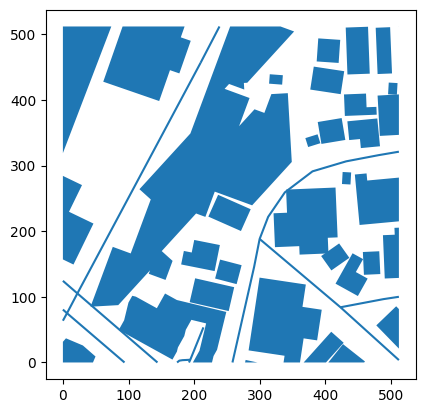

In [203]:
copy = clipped.copy()
copy.set_crs(None, allow_override=True, inplace=True)

copy = copy.apply(
    lambda geom: shift_geometry(geom, minx, miny)
)
copy = copy.apply(
    lambda geom: scale_geometry(geom, 512/(maxx-minx), 512/(maxy-miny))
)
copy.plot()

In [197]:
clipped_gdf = gpd.GeoDataFrame(geometry=clipped)
clipped_gdf.set_crs(None, allow_override=True, inplace=True)

,geometry
34,"LINESTRING (121.03027 14.58045, 121.03025 14.5..."
19,"POLYGON ((121.03026 14.58035, 121.03033 14.580..."
42,"LINESTRING (121.03027 14.58045, 121.0305 14.58..."
46,"LINESTRING (121.03077 14.58027, 121.03074 14.5..."
41,"LINESTRING (121.03064 14.58026, 121.03031 14.5..."
40,"LINESTRING (121.03082 14.5804, 121.03077 14.58..."
20,"POLYGON ((121.03081 14.5803, 121.03084 14.5804..."
38,"LINESTRING (121.03031 14.58053, 121.03027 14.5..."
44,"LINESTRING (121.03031 14.58053, 121.03025 14.5..."
2,"POLYGON ((121.03079 14.58074, 121.03089 14.580..."


<Axes: >

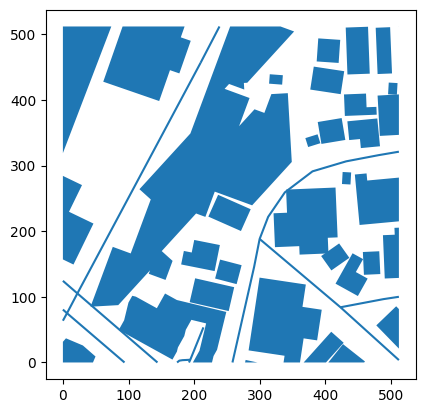

In [200]:
scaled_clipped = clipped_gdf['geometry'].apply(
    lambda geom: shift_geometry(geom, minx, miny)
)
scaled_clipped = scaled_clipped.apply(
    lambda geom: scale_geometry(geom, 512/(maxx-minx), 512/(maxy-miny))
)
scaled_clipped.plot()